In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 13.3 MB/s eta 0:00:00


In [ ]:
import pickle
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import xgboost as xg
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn import model_selection
import shap

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#df = pd.read_csv(r'/content/gdrive/My Drive/openclassrooms/2016_Building_Energy_Benchmarking.tsv', sep = '\t')


In [ ]:
def pipeline_train_ghge(df_train):
   X = df_train.drop(['TotalGHGEmissions'], axis = 1, inplace = False)
   X = X.drop(['OSEBuildingID', 'ZipCode', 'CouncilDistrictCode', 'SiteEnergyUse(kBtu)', 'ENERGYSTARScore' ,'GHGEmissionsIntensity'], axis = 1)
   Y = df_train['SiteEnergyUse(kBtu)']
   Y = Y.fillna(np.mean(Y))
   numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
   categorical_features = X.select_dtypes(include=['object']).columns
   numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
   categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])
   preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])
   rf = Pipeline(steps=[('preprocessor', preprocessor), ('regression', Lasso(alpha = 0.2))])
   rf.fit(X_train, y_test)
   pickle.dump(rf, open('/content/gdrive/My Drive/projet_prediction/updated_energy_model.pkl','wb'))
   return rf
                                                        
   
   
   





In [178]:
print(numeric_features)

Index(['DataYear', 'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
       'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)',
       'SourceEUIWN(kBtu/sf)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'Comments'],
      dtype='object')


In [ ]:
def pipeline_test_energy(test):
  numeric_features = test.select_dtypes(include=['int64', 'float64']).columns
  categorical_features = test.select_dtypes(include=['object']).columns
  numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
  categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])
  preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])
  test_tr = preprocessor.fit_transform(test)
  model = pickle.load(open('/content/gdrive/My Drive/projet_prediction/updated_energy_model.pkl','rb'))
  predictions = model.predict(test_tr)
  return predictions


In [ ]:
print(X.columns)

Index(['DataYear', 'BuildingType', 'PrimaryPropertyType', 'PropertyName',
       'Address', 'City', 'State', 'TaxParcelIdentificationNumber',
       'Neighborhood', 'Latitude', 'Longitude', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)',
       'SourceEUIWN(kBtu/sf)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier'],
      dtype='object')


In [ ]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y,test_size= 0.3)
display(X_test) 

,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,TaxParcelIdentificationNumber,Neighborhood,Latitude,...,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier
63,2016,NonResidential,Medical Office,Polyclinic North && South,1200 Harvard Ave,Seattle,WA,1978201270,EAST,47.61244,...,1.652771e+07,0.0,2.897563e+06,9886484.0,68145.703130,6814570.0,False,NaN,Compliant,NaN
1823,2016,Multifamily MR (5-9),Mid-Rise Multifamily,Sentinel Condominiums,320 Melrose Ave E,Seattle,WA,7693700000,EAST,47.62140,...,7.029360e+05,0.0,1.961365e+05,669218.0,0.000000,0.0,False,NaN,Compliant,NaN
2241,2016,NonResidential,Worship Facility,Trinity United Methodist Church,6512 23rd Avenue NW,Seattle,WA,7518507190,BALLARD,47.67640,...,1.342449e+06,0.0,6.245490e+04,213096.0,9351.059570,935106.0,False,NaN,Compliant,NaN
523,2016,NonResidential,Large Office,Pier 69 Corporate HQ,2711 Alaskan Way,Seattle,WA,7666202295,DOWNTOWN,47.61400,...,1.044564e+07,0.0,2.946509e+06,10053488.0,0.000000,0.0,False,NaN,Compliant,NaN
1443,2016,Multifamily LR (1-4),Low-Rise Multifamily,ELDORADO THE CONDOMINIUM,3630 26TH PL W,Seattle,WA,2296600000,MAGNOLIA / QUEEN ANNE,47.65314,...,9.947169e+05,0.0,2.708303e+05,924073.0,0.000000,0.0,False,NaN,Compliant,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,2016,NonResidential,Self-Storage Facility,Greenwood Self Service Storage,10115 Greenwood Ave N.,Seattle,WA,3626039349,NORTHWEST,47.70281,...,1.393424e+06,0.0,1.336377e+05,455972.0,7868.400391,786840.0,False,NaN,Compliant,NaN
3206,2016,NonResidential,Small- and Mid-Sized Office,Bullitt Center,1501 E. Madison St.,Seattle,WA,7234600195,CENTRAL,47.61432,...,2.401321e+05,0.0,-3.382680e+04,-115417.0,0.000000,0.0,False,NaN,Compliant,NaN
1961,2016,NonResidential,Warehouse,NWCP-SEA Bldg D,600 S. Brandon Street,Seattle,WA,5084400170,GREATER DUWAMISH,47.55458,...,1.338476e+06,0.0,3.721710e+05,1269847.0,0.000000,0.0,False,NaN,Compliant,NaN
164,2016,NonResidential,Mixed Use Property,TriBeCa,516 1st Ave W,Seattle,WA,8681450000,MAGNOLIA / QUEEN ANNE,47.62390,...,1.086403e+07,0.0,2.971734e+06,10139555.0,4183.540039,418354.0,False,NaN,Compliant,NaN


#Interpretability

In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/openclassrooms/df_regression.csv')

In [ ]:
display(df['Unnamed: 0'])
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

0        0
1        1
2        2
3        3
4        4
      ... 
422    422
423    423
424    424
425    425
426    426
Name: Unnamed: 0, Length: 427, dtype: int64

In [ ]:
df_regression = df.copy()

In [ ]:
df.drop(['ENERGYSTARScore'], axis = 1, inplace = True )

In [ ]:
X = df_regression.drop(['TotalGHGEmissions'], axis = 1, inplace = False)
X = X.drop(['GHGEmissionsIntensity'], axis = 1)
X = X.drop(['ZipCode', 'CouncilDistrictCode', 'SiteEnergyUse(kBtu)' ], axis = 1)
Y = df_regression['SiteEnergyUse(kBtu)']

In [ ]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y,test_size= 0.3)
display(X_test) 

,DataYear,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SiteEUI(kBtu/sf),...,SecondLargestPropertyUseType_Non-Refrigerated Warehouse,SecondLargestPropertyUseType_Office,SecondLargestPropertyUseType_Other,SecondLargestPropertyUseType_Other - Education,SecondLargestPropertyUseType_Other - Restaurant/Bar,SecondLargestPropertyUseType_Parking,SecondLargestPropertyUseType_Restaurant,SecondLargestPropertyUseType_Retail Store,SecondLargestPropertyUseType_Self-Storage Facility,SecondLargestPropertyUseType_Supermarket/Grocery Store
23,2016,47.60995,-122.33904,1906,1.0,4,63540,63540,56747.0,62.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
312,2016,47.53419,-122.36624,1970,1.0,3,36879,36879,16855.0,67.900002,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
88,2016,47.68576,-122.35481,1922,1.0,2,21022,21022,21022.0,45.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,2016,47.70956,-122.33450,1996,1.0,3,55442,55442,28636.0,85.599998,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
228,2016,47.55832,-122.35239,1980,1.0,1,24100,24100,20100.0,34.299999,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2016,47.60427,-122.33385,1978,1.0,2,38539,26160,15549.0,83.599998,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
29,2016,47.62115,-122.35970,1974,1.0,5,88062,67236,64752.0,52.700001,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
54,2016,47.55515,-122.32750,1974,1.0,1,93020,93020,93020.0,13.500000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
316,2016,47.52254,-122.36627,2005,1.0,1,26208,26208,32427.0,49.599998,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
model = pickle.load(open('/content/gdrive/My Drive/projet_prediction/best_energy_model.pkl','rb'))

In [ ]:
explainer = shap.Explainer(model.predict, X_test)
shap_values = explainer(X_test)

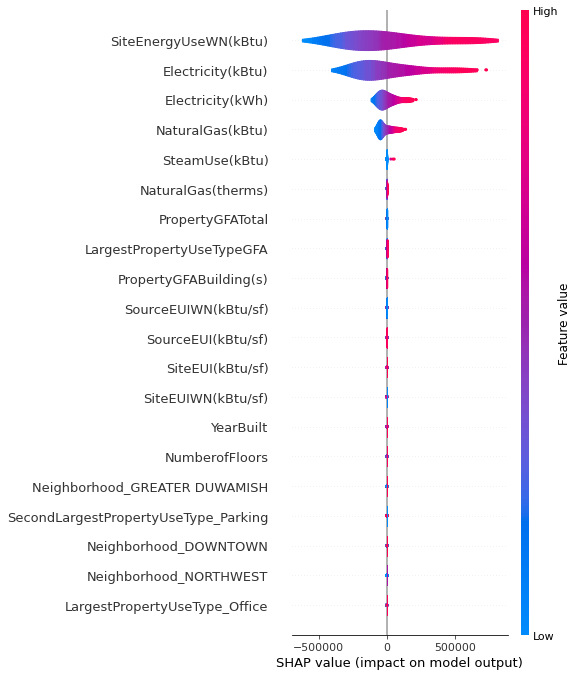

In [ ]:
shap.summary_plot(shap_values, plot_type='violin')


In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/openclassrooms/df_regression.csv')

In [ ]:
display(df['Unnamed: 0'])
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

0        0
1        1
2        2
3        3
4        4
      ... 
422    422
423    423
424    424
425    425
426    426
Name: Unnamed: 0, Length: 427, dtype: int64

In [ ]:
df_regression = df.copy()

In [ ]:
df.drop(['ENERGYSTARScore'], axis = 1, inplace = True )

In [ ]:
X = df_regression.drop(['TotalGHGEmissions'], axis = 1, inplace = False)
X = X.drop(['GHGEmissionsIntensity'], axis = 1)
X = X.drop(['ZipCode', 'CouncilDistrictCode', 'SiteEnergyUse(kBtu)', 'DataYear', 'ENERGYSTARScore' ], axis = 1)
Y = df_regression['GHGEmissionsIntensity']

In [ ]:
model = pickle.load(open('/content/gdrive/My Drive/projet_prediction/finetuned_GHGE_model.pkl','rb'))


[15:51:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y,test_size= 0.3)
display(X_test) 

,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),...,SecondLargestPropertyUseType_Non-Refrigerated Warehouse,SecondLargestPropertyUseType_Office,SecondLargestPropertyUseType_Other,SecondLargestPropertyUseType_Other - Education,SecondLargestPropertyUseType_Other - Restaurant/Bar,SecondLargestPropertyUseType_Parking,SecondLargestPropertyUseType_Restaurant,SecondLargestPropertyUseType_Retail Store,SecondLargestPropertyUseType_Self-Storage Facility,SecondLargestPropertyUseType_Supermarket/Grocery Store
410,47.59951,-122.32033,2000,1.0,3,54969,54969,54969.0,67.699997,68.599998,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
222,47.61010,-122.30838,1901,1.0,2,26560,26560,26560.0,65.900002,69.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
18,47.60266,-122.33332,1900,1.0,7,89550,89550,64712.0,47.700001,50.599998,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
347,47.59979,-122.33318,1902,1.0,4,39030,39030,32001.0,18.400000,20.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
248,47.57460,-122.32637,1952,1.0,1,41308,41308,41308.0,39.799999,43.400002,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,47.58034,-122.31132,1900,1.0,2,52554,52554,51029.0,50.099998,53.500000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
150,47.65570,-122.34682,1958,1.0,2,21436,21436,21436.0,24.900000,26.100000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
322,47.60192,-122.31641,1926,1.0,1,20000,20000,20000.0,37.200001,43.900002,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
123,47.64834,-122.33188,2012,1.0,2,84116,57619,55000.0,48.000000,48.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
explainer = shap.Explainer(model.predict, X_test)
shap_values = explainer(X_test)

Permutation explainer: 130it [00:42,  2.31it/s]


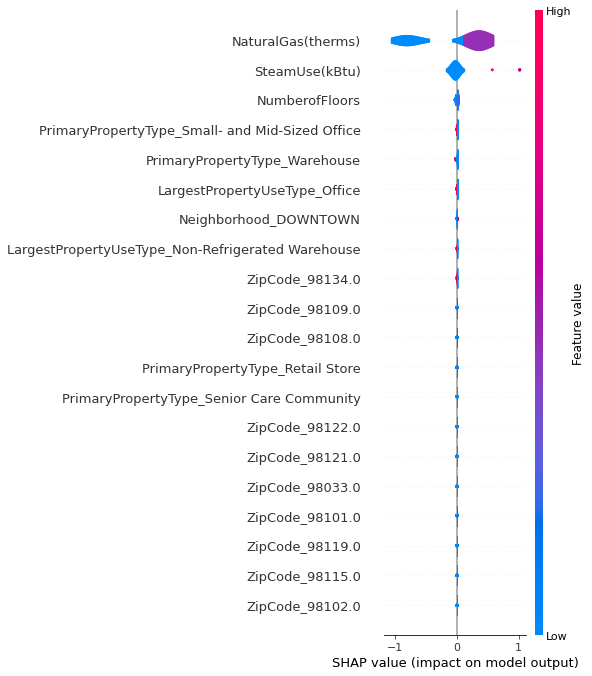

In [ ]:
shap.summary_plot(shap_values, plot_type='violin')
